In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics
from heapq import nlargest
from heapq import nsmallest
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA

In [45]:
data = pd.read_csv('FORECAST_clean.csv',sep=',')
# dfs = dict(tuple(data.groupby('API_code'))) # Every API as a dictionary key

In [46]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['Week_year'] = data.DATE.dt.strftime('%Y-%V')
data['Month_year'] = data.DATE.dt.strftime('%Y-%m')
# Convert the weekly aggregated data
data_weekly = data.groupby(['API_fam_code', 'Week_year']).sum()
data_weekly = data_weekly.drop(['API_code'], axis = 1 )
data_weekly_dict = dict(tuple(data_weekly.groupby('API_fam_code')))
# Convert the monthly aggregated data
data_monthly = data.groupby(['API_fam_code', 'Month_year']).sum()
data_monthly = data_monthly.drop(['API_code'], axis = 1 )
data_monthly_dict = dict(tuple(data_monthly.groupby('API_fam_code')))

#len_monthly = len(data_weekly_dict['JUG01A4158P109'])
Dataset1 = data_weekly_dict['JUG01S3193P159']
Dataset2 = data_weekly_dict['JUG01U3194P149']
Dataset1.to_csv('forecast1.csv',index=True)
Dataset2.to_csv('forecast2.csv',index=True)

In [51]:
with_forecast1 = pd.read_csv('forecast1.csv')
with_forecast2 = pd.read_csv('forecast2.csv')
with_forecast1.set_index('Week_year',inplace=True)
with_forecast2.set_index('Week_year',inplace=True)
with_forecast1.drop(['API_fam_code'],axis=1)
with_forecast2.drop(['API_fam_code'],axis=1)

,SOLD2
Week_year,
2014-01,0.000000
2014-02,15187.500000
2014-03,20812.500000
2014-04,5062.500000
2014-05,2250.000000
...,...
2019-22,7972.080882
2019-23,7999.167480
2019-24,8014.005350


In [60]:
df1 = pd.concat([with_forecast1,with_forecast2],axis=1)
df1.drop(['API_fam_code'],axis=1).tail()
len(df1)

288

df1['SOLD1'][-100:].plot(figsize=(12,8))
df1['SOLD2'][-100:].plot(figsize=(12,8))
#forecast.plot(figsize=(12,8))

<Figure size 576x288 with 0 Axes>

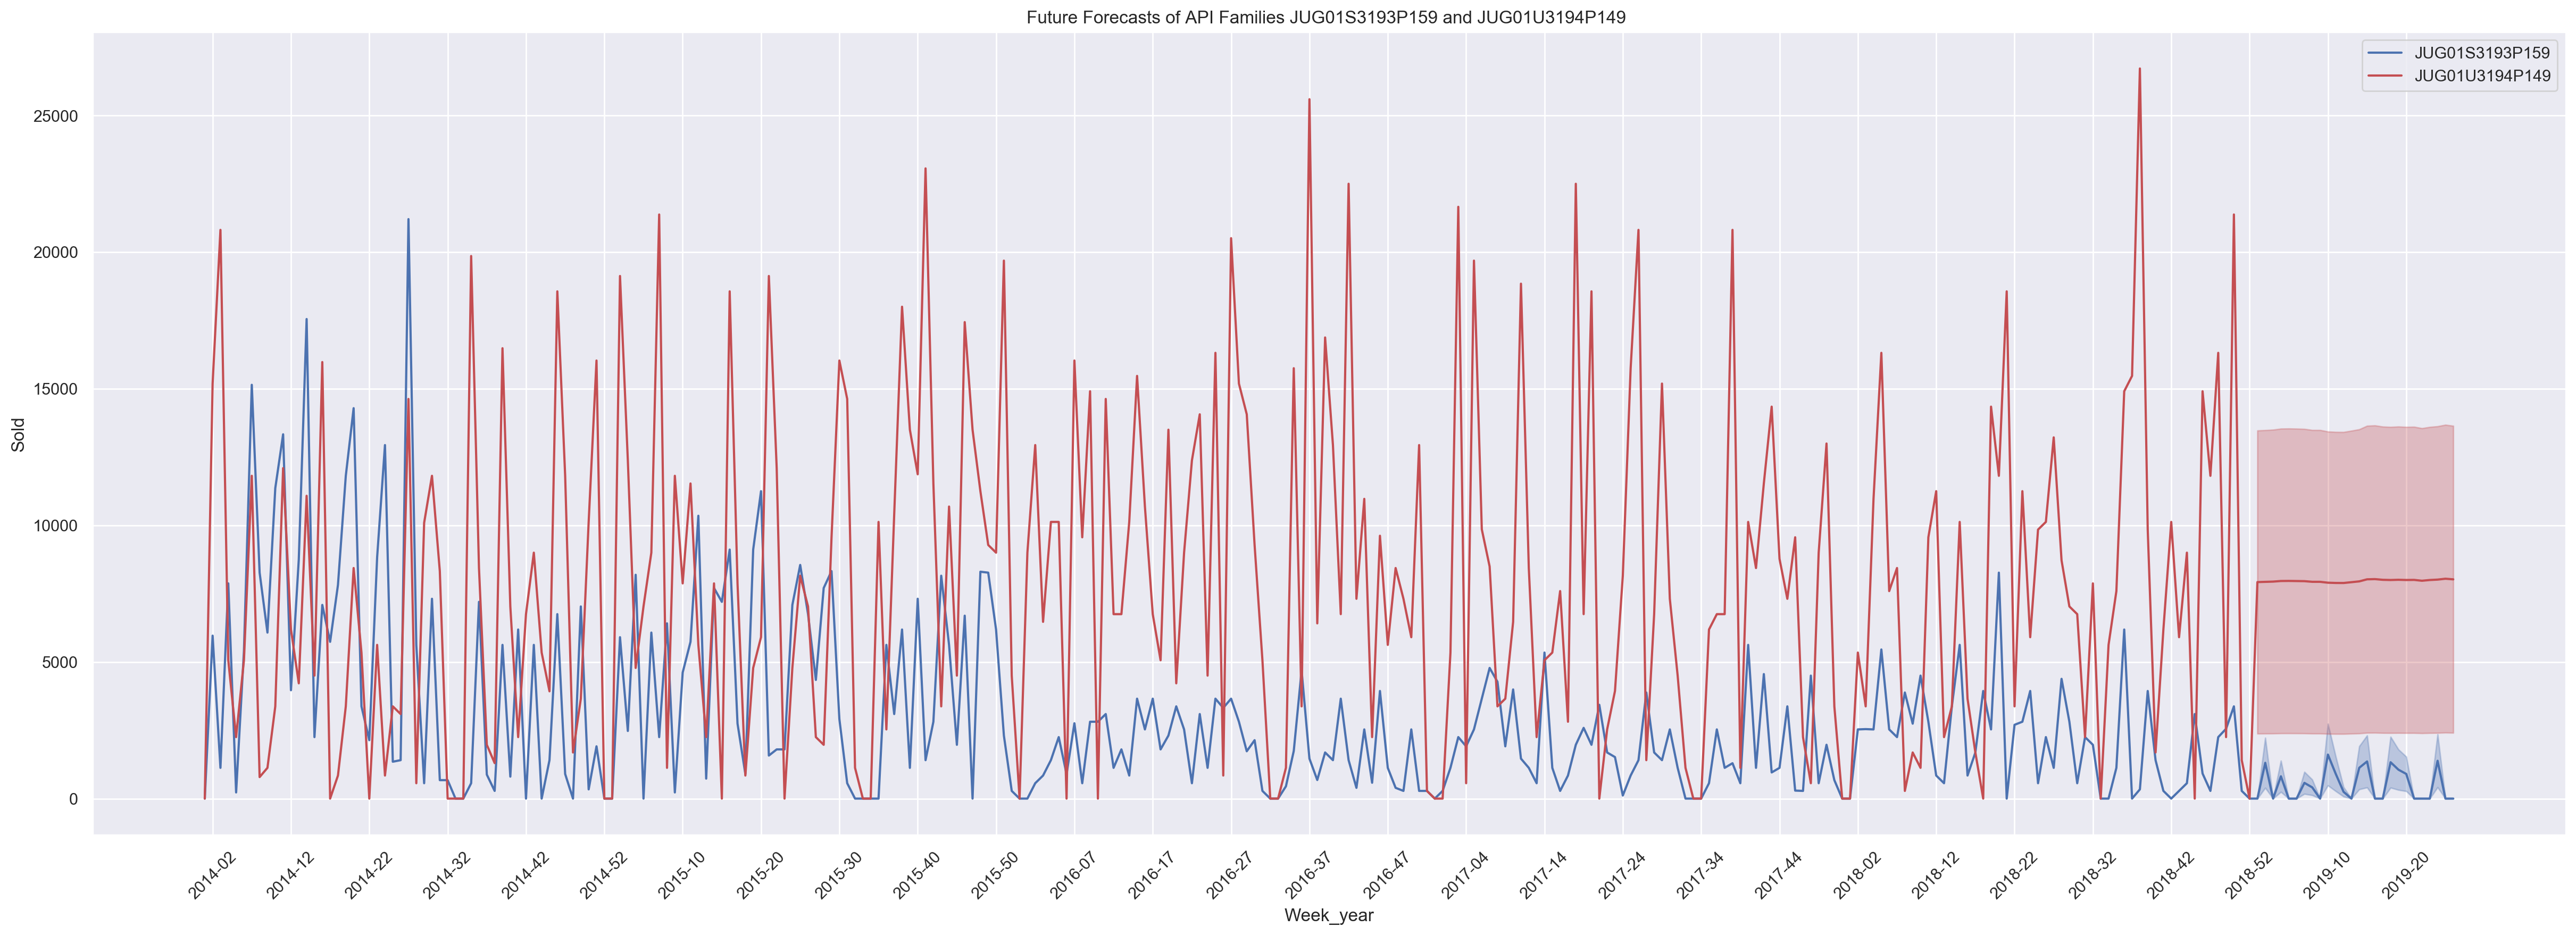

<Figure size 576x288 with 0 Axes>

In [64]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import rcParams
from matplotlib import pyplot
figure(num=2, figsize=(30, 10), dpi=200, facecolor='w', edgecolor='k')
plt.plot(df1.index,df1['SOLD1'],color='b',label='JUG01S3193P159')
plt.plot(df1.index,df1['SOLD2'],color='r',label='JUG01U3194P149')
x=df1['SOLD1'][-26:]
y=df1['SOLD2'][-26:]
c1 = 0.70 * x
c2 = 0.70 * y
plt.fill_between(df1.index[-26:],(x-c1),(x+c1), color='b', alpha=.3)
plt.fill_between(df1.index[-26:],(y-c2),(y+c2), color='r', alpha=.3)
plt.legend()
plt.title('Future Forecasts of API Families JUG01S3193P159 and JUG01U3194P149 ')
plt.xticks(rotation=45)
plt.xticks(np.arange(1,288, 10.0))
#plt.tight_layout()
plt.xlabel('Week_year')
plt.ylabel('Sold')
plt.figure()

Dataset3 = data_monthly_dict['JUG01E4357P109']
Dataset4 = data_monthly_dict['JUG01I6090P109']
Dataset5 = data_monthly_dict['JUG01Q1104P109']
Dataset6 = data_monthly_dict['JUG01R3355P109']
Dataset7 = data_monthly_dict['JUG01U1194L0399']
Dataset8 = data_monthly_dict['JUG01U1194P149']
Dataset9 = data_monthly_dict['JUG01U3194P1659']
Dataset10 = data_monthly_dict['JUG01U3610P109']
Dataset11 = data_monthly_dict['JUG01U5602P109']
Dataset12= data_monthly_dict['JUG01U7703P109']
Dataset3.to_csv('forecast3.csv',index=True)
Dataset4.to_csv('forecast4.csv',index=True)
Dataset5.to_csv('forecast5.csv',index=True)
Dataset6.to_csv('forecast6.csv',index=True)
Dataset7.to_csv('forecast7.csv',index=True)
Dataset8.to_csv('forecast8.csv',index=True)
Dataset9.to_csv('forecast9.csv',index=True)
Dataset10.to_csv('forecast10.csv',index=True)
Dataset11.to_csv('forecast11.csv',index=True)
Dataset12.to_csv('forecast12.csv',index=True)

In [65]:
with_forecast3 = pd.read_csv('forecast3.csv')
with_forecast4 = pd.read_csv('forecast4.csv')
with_forecast5 = pd.read_csv('forecast5.csv')
with_forecast6 = pd.read_csv('forecast6.csv')
with_forecast7 = pd.read_csv('forecast7.csv')
with_forecast8 = pd.read_csv('forecast8.csv')
with_forecast9 = pd.read_csv('forecast9.csv')
with_forecast10 = pd.read_csv('forecast10.csv')
with_forecast11 = pd.read_csv('forecast11.csv')
with_forecast12 = pd.read_csv('forecast12.csv')
with_forecast3.set_index('Month_year',inplace=True)
with_forecast4.set_index('Month_year',inplace=True)
with_forecast5.set_index('Month_year',inplace=True)
with_forecast6.set_index('Month_year',inplace=True)
with_forecast7.set_index('Month_year',inplace=True)
with_forecast8.set_index('Month_year',inplace=True)
with_forecast9.set_index('Month_year',inplace=True)
with_forecast10.set_index('Month_year',inplace=True)
with_forecast11.set_index('Month_year',inplace=True)
with_forecast12.set_index('Month_year',inplace=True)

In [66]:
df2 = pd.concat([with_forecast3,with_forecast4,with_forecast5,with_forecast6,with_forecast7,with_forecast8,with_forecast9,with_forecast10,with_forecast11,with_forecast12],axis=1)
df2.drop(['API_fam_code'],axis=1).head()

,SOLD1,SOLD2,SOLD3,SOLD4,SOLD5,SOLD6,SOLD7,SOLD8,SOLD9,SOLD10
Month_year,,,,,,,,,,
2014-01,17887.50,5006.25,1968.75,1406.25,6750.0,3825.0,3656.25,9562.5,14906.250,26662.50
2014-02,4500.00,5625.00,3375.00,1383.75,15187.5,4725.0,9393.75,3937.5,5062.500,17493.75
2014-03,112.50,8156.25,3150.00,4500.00,6750.0,2250.0,14906.25,16312.5,13781.250,7425.00
2014-04,843.75,7571.25,562.50,2531.25,10125.0,6750.0,3656.25,0.0,6468.750,17156.25
2014-05,1968.75,6750.00,5343.75,2531.25,15187.5,12825.0,6187.50,3375.0,275.625,15075.00


<Figure size 576x288 with 0 Axes>

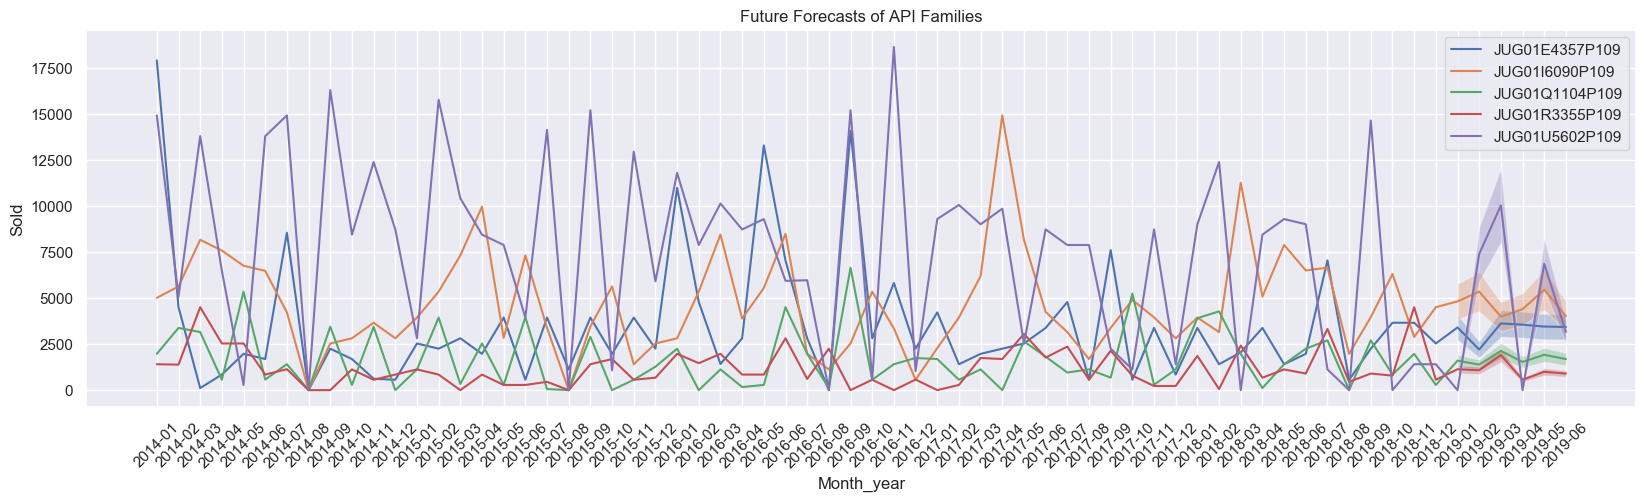

<Figure size 576x288 with 0 Axes>

In [70]:
from matplotlib.pyplot import figure
figure(num=2, figsize=(20, 5), dpi=100, facecolor='w', edgecolor='k')
plt.plot(df2.index,df2['SOLD1'],label='JUG01E4357P109')
plt.plot(df2.index,df2['SOLD2'],label='JUG01I6090P109')
plt.plot(df2.index,df2['SOLD3'],label='JUG01Q1104P109')
plt.plot(df2.index,df2['SOLD4'],label='JUG01R3355P109')
#plt.plot(df2.index,df2['SOLD5'],label='JUG01U1194L0399')
#plt.plot(df2.index,df2['SOLD6'],label='JUG01U1194P149')
#plt.plot(df2.index,df2['SOLD7'],label='JUG01U3194P1659')
#plt.plot(df2.index,df2['SOLD8'],label='JUG01U3610P109')
plt.plot(df2.index,df2['SOLD9'],label='JUG01U5602P109')
#plt.plot(df2.index,df2['SOLD10'],label='JUG01U7703P109')
c1 = 0.20 * df2['SOLD1'][-6:]
c2 = 0.20 * df2['SOLD2'][-6:]
c3 = 0.20 * df2['SOLD3'][-6:]
c4 = 0.20 * df2['SOLD4'][-6:]
c5 = 0.20 * df2['SOLD5'][-6:]
c6 = 0.20 * df2['SOLD6'][-6:]
c7 = 0.20 * df2['SOLD7'][-6:]
c8 = 0.20 * df2['SOLD8'][-6:]
c9 = 0.20 * df2['SOLD9'][-6:]
c10 = 0.20 * df2['SOLD10'][-6:]
plt.fill_between(df2.index[-6:],(df2['SOLD1'][-6:]-c1),(df2['SOLD1'][-6:]+c1), alpha=.3)
plt.fill_between(df2.index[-6:],(df2['SOLD2'][-6:]-c2),(df2['SOLD2'][-6:]+c2), alpha=.3)
plt.fill_between(df2.index[-6:],(df2['SOLD3'][-6:]-c3),(df2['SOLD3'][-6:]+c3), alpha=.3)
plt.fill_between(df2.index[-6:],(df2['SOLD4'][-6:]-c4),(df2['SOLD4'][-6:]+c4), alpha=.3)
#plt.fill_between(df2.index[-6:],(df2['SOLD5'][-6:]-c5),(df2['SOLD5'][-6:]+c5), alpha=.3)
#plt.fill_between(df2.index[-6:],(df2['SOLD6'][-6:]-c6),(df2['SOLD6'][-6:]+c6), alpha=.3)
#plt.fill_between(df2.index[-6:],(df2['SOLD7'][-6:]-c7),(df2['SOLD7'][-6:]+c7), alpha=.3)
#plt.fill_between(df2.index[-6:],(df2['SOLD8'][-6:]-c8),(df2['SOLD8'][-6:]+c8), alpha=.3)
plt.fill_between(df2.index[-6:],(df2['SOLD9'][-6:]-c9),(df2['SOLD9'][-6:]+c9), alpha=.3)
#plt.fill_between(df2.index[-6:],(df2['SOLD10'][-6:]-c10),(df2['SOLD10'][-6:]+c10), alpha=.3)
plt.legend()
plt.title('Future Forecasts of API Families')
plt.xticks(rotation=45)
#plt.xticks(np.arange(1,288, 10.0))
#plt.tight_layout()
plt.xlabel('Month_year')
plt.ylabel('Sold')
plt.figure()

with_forecast6[['SOLD','Forecast']][-6:].plot(figsize=(10,5))
plt.title('Historical Forecasts API Family JUG01R3355P109')
with_forecast7[['SOLD','Forecast']][-6:].plot(figsize=(10,5))
plt.title('Historical Forecasts API Family JUG01U1194L0399')
with_forecast8[['SOLD','Forecast']][-6:].plot(figsize=(10,5))
plt.title('Historical Forecasts API Family JUG01U1194P149')

with_forecast9[['SOLD','Forecast']][-6:].plot(figsize=(10,5))
plt.title('Historical Forecasts API Family JUG01U3194P1659')
with_forecast10[['SOLD','Forecast']][-6:].plot(figsize=(10,5))
plt.title('Historical Forecasts API Family JUG01U3610P109')
with_forecast11[['SOLD','Forecast']][-6:].plot(figsize=(10,5))
plt.title('Historical Forecasts API Family JUG01U5602P109')

with_forecast12[['SOLD','Forecast']][-6:].plot(figsize=(10,5))
plt.title('Historical Forecasts API Family JUG01U7703P109')

In [5]:
no_zeros_week = []
for key, df in data_weekly_dict.items():
    no_week = df['SOLD'].astype(bool).sum(axis=0) / 261
    no_zeros_week.append(no_week)

API_Families_week = list(data_weekly_dict.keys())

no_zeros_month = []
for key, df in data_monthly_dict.items():
    no_month = df['SOLD'].astype(bool).sum(axis=0) / len_monthly
    no_zeros_month.append(no_month)
    
API_Families_month = list(data_monthly_dict.keys())

In [6]:
list_of_zeros_week = pd.DataFrame(
    {'API_family': API_Families_week,
     'Not_Zeros': no_zeros_week
    })

list_of_zeros_month = pd.DataFrame(
    {'API_family': API_Families_month,
     'Not_Zeros': no_zeros_month
    })

In [74]:
list_of_zeros_week.sort_values(by = 'Not_Zeros', ascending = False).head(2)

NameError: name 'list_of_zeros_week' is not defined

In [8]:
list_of_zeros_month.sort_values(by = 'Not_Zeros', ascending = False).head(20)

,API_family,Not_Zeros
44,JUG01U3194P149,1.000000
61,JUG01U7703P109,0.983333
28,JUG01S3193P159,0.983333
15,JUG01I6090P109,0.966667
8,JUG01E4357P109,0.966667
38,JUG01U1194P149,0.966667
36,JUG01U1194L0399,0.950000
46,JUG01U3194P1659,0.933333
56,JUG01U5602P109,0.900000
24,JUG01R3355P109,0.883333


,API_family,Not_Zeros
44,JUG01U3194P149,1.000000
61,JUG01U7703P109,0.983333
28,JUG01S3193P159,0.983333
15,JUG01I6090P109,0.966667
8,JUG01E4357P109,0.966667
38,JUG01U1194P149,0.966667
36,JUG01U1194L0399,0.950000
46,JUG01U3194P1659,0.933333
56,JUG01U5602P109,0.900000
24,JUG01R3355P109,0.883333


In [9]:
list_of_zeros_week_dict = dict(zip(list_of_zeros_week.API_family, list_of_zeros_week.Not_Zeros))
list_of_zeros_month_dict = dict(zip(list_of_zeros_month.API_family, list_of_zeros_month.Not_Zeros))

In [10]:
# Loops these from the end of the code
# data['no_week'] = data['API_fam_code'].map(list_of_zeros_week_dict)
# data['no_month'] = data['API_fam_code'].map(list_of_zeros_month_dict)

In [11]:
weekly_API_families = list_of_zeros_week[list_of_zeros_week['Not_Zeros'] > 0.80] 
weekly_API_families = weekly_API_families.drop(['Not_Zeros'], axis = 1)
weekly_API_families = list(weekly_API_families['API_family'])
weekly_API_families

['JUG01S3193P159', 'JUG01U3194P149']

['JUG01S3193P159', 'JUG01U3194P149']

In [12]:
monthly_API_families = list_of_zeros_month[list_of_zeros_month['Not_Zeros'] > 0.80] 
monthly_API_families = monthly_API_families.drop(['Not_Zeros'], axis = 1)
monthly_API_families = list(monthly_API_families['API_family'])
monthly_API_families = [x for x in monthly_API_families if x not in weekly_API_families]

In [13]:
weekly_forecast = {key: data_weekly_dict[key] for key in weekly_API_families}
monthly_forecast = {key: data_monthly_dict[key] for key in monthly_API_families}

In [14]:
weekly_forecast

{'JUG01S3193P159':                              SOLD        STOCK    BOOKED  RESERVED
 API_fam_code   Week_year                                          
 JUG01S3193P159 2014-01       0.00  412548.7500   18000.0       0.0
                2014-02    5962.50  304053.7500   15750.0       0.0
                2014-03    1125.00  284478.7500   15750.0       0.0
                2014-04    7875.00  316203.7500  167625.0       0.0
                2014-05     225.00  510378.7500  192937.5       0.0
 ...                           ...          ...       ...       ...
                2018-48    2250.00  424139.0625   15750.0   40950.0
                2018-49    2553.75  411921.5625   15750.0   40950.0
                2018-50    3375.00  388223.4375   15750.0   40950.0
                2018-51     281.25  386026.8750   15750.0   40950.0
                2018-52       0.00  386048.2500   15750.0   40950.0
 
 [262 rows x 4 columns],
 'JUG01U3194P149':                               SOLD         STOCK    

{'JUG01S3193P159':                              SOLD        STOCK    BOOKED  RESERVED
 API_fam_code   Week_year                                          
 JUG01S3193P159 2014-01       0.00  412548.7500   18000.0       0.0
                2014-02    5962.50  304053.7500   15750.0       0.0
                2014-03    1125.00  284478.7500   15750.0       0.0
                2014-04    7875.00  316203.7500  167625.0       0.0
                2014-05     225.00  510378.7500  192937.5       0.0
 ...                           ...          ...       ...       ...
                2018-48    2250.00  424139.0625   15750.0   40950.0
                2018-49    2553.75  411921.5625   15750.0   40950.0
                2018-50    3375.00  388223.4375   15750.0   40950.0
                2018-51     281.25  386026.8750   15750.0   40950.0
                2018-52       0.00  386048.2500   15750.0   40950.0
 
 [262 rows x 4 columns],
 'JUG01U3194P149':                               SOLD         STOCK    

In [16]:
#Weekly forecaster
# Uses data weekly forecast

import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

forecast_rolling_week = [] #The rolling forecasts for the API_Families for the last 26 weeks of the test period, always in the chunks of 26 per API_family
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
# prepare trainin]g dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    error = mean_absolute_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    for t in range(0,26):
        model = ARIMA(dataset[0:210 + t], best_cfg)
        model_fit = model.fit()
        forecast_t = model_fit.predict(start = 236 + t , end = 236 + t)[0]
        forecast_rolling_week.append(forecast_t)

        
# evaluate parameters
warnings.filterwarnings("ignore")
for dataset in weekly_forecast:
    evaluate_models(weekly_forecast[dataset]['SOLD'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1904.255
ARIMA(0, 0, 0) MSE=1904.255
ARIMA(0, 0, 1) MSE=1798.203
ARIMA(0, 0, 1) MSE=1798.203
ARIMA(0, 0, 2) MSE=1770.445
ARIMA(0, 0, 2) MSE=1770.445
ARIMA(0, 1, 0) MSE=1786.418
ARIMA(0, 1, 0) MSE=1786.418
ARIMA(0, 1, 1) MSE=1338.230
ARIMA(0, 1, 1) MSE=1338.230
ARIMA(0, 2, 0) MSE=3211.888
ARIMA(0, 2, 0) MSE=3211.888
ARIMA(0, 2, 1) MSE=1801.438
ARIMA(0, 2, 1) MSE=1801.438
ARIMA(1, 0, 0) MSE=1747.260
ARIMA(1, 0, 0) MSE=1747.260
ARIMA(1, 0, 1) MSE=1464.850
ARIMA(1, 0, 1) MSE=1464.850
ARIMA(1, 0, 2) MSE=1471.013
ARIMA(1, 0, 2) MSE=1471.013
ARIMA(1, 1, 0) MSE=1654.088
ARIMA(1, 1, 0) MSE=1654.088
ARIMA(1, 1, 1) MSE=1343.226
ARIMA(1, 1, 1) MSE=1343.226
ARIMA(1, 1, 2) MSE=1351.310
ARIMA(1, 1, 2) MSE=1351.310
ARIMA(1, 2, 0) MSE=2439.550
ARIMA(1, 2, 0) MSE=2439.550
ARIMA(2, 0, 0) MSE=1690.312
ARIMA(2, 0, 0) MSE=1690.312
ARIMA(2, 0, 1) MSE=1467.735
ARIMA(2, 0, 1) MSE=1467.735
ARIMA(2, 0, 2) MSE=1484.005
ARIMA(2, 0, 2) MSE=1484.005
ARIMA(2, 1, 0) MSE=1505.750
ARIMA(2, 1, 0) MSE=1

In [18]:
#Monthly forecaster
# Uses data monthly forecast

import warnings
from sklearn.metrics import mean_squared_error

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

forecast_rolling_month = [] #The rolling forecasts for the API_Families for the last 26 weeks of the test period, always in the chunks of 26 per API_family
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
# prepare trainin]g dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    error = mean_absolute_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    for t in range(0,6):
        model = ARIMA(dataset[0:48 + t], best_cfg)
        model_fit = model.fit()
        forecast_t = model_fit.predict(start = 54 + t , end = 54 + t)[0]
        forecast_rolling_month.append(forecast_t)
        

# evaluate parameters
warnings.filterwarnings("ignore")

for dataset in monthly_forecast: 
    evaluate_models(monthly_forecast[dataset]['SOLD'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1639.844
ARIMA(0, 0, 0) MSE=1639.844
ARIMA(0, 0, 1) MSE=1653.597
ARIMA(0, 0, 1) MSE=1653.597
ARIMA(0, 0, 2) MSE=1669.291
ARIMA(0, 1, 0) MSE=2578.003
ARIMA(0, 0, 2) MSE=1669.291
ARIMA(0, 1, 0) MSE=2578.003
ARIMA(0, 1, 1) MSE=1674.833
ARIMA(0, 1, 1) MSE=1674.833
ARIMA(0, 1, 2) MSE=1725.653
ARIMA(0, 2, 0) MSE=4500.003
ARIMA(0, 1, 2) MSE=1725.653
ARIMA(0, 2, 0) MSE=4500.003
ARIMA(0, 2, 1) MSE=2424.195
ARIMA(0, 2, 1) MSE=2424.195
ARIMA(1, 0, 0) MSE=1654.108
ARIMA(1, 0, 0) MSE=1654.108
ARIMA(1, 0, 1) MSE=1557.813
ARIMA(1, 0, 1) MSE=1557.813
ARIMA(1, 0, 2) MSE=1688.902
ARIMA(1, 0, 2) MSE=1688.902
ARIMA(1, 1, 0) MSE=1859.031
ARIMA(1, 1, 0) MSE=1859.031
ARIMA(1, 1, 1) MSE=1688.342
ARIMA(1, 1, 1) MSE=1688.342
ARIMA(1, 1, 2) MSE=2106.140
ARIMA(1, 1, 2) MSE=2106.140
ARIMA(1, 2, 0) MSE=2736.265
ARIMA(1, 2, 0) MSE=2736.265
ARIMA(2, 0, 0) MSE=1678.066
ARIMA(2, 0, 0) MSE=1678.066
ARIMA(2, 1, 0) MSE=1777.933
ARIMA(2, 1, 0) MSE=1777.933
ARIMA(2, 1, 1) MSE=1679.692
ARIMA(2, 1, 1) MSE=1

ARIMA(4, 0, 0) MSE=5176.555
ARIMA(4, 0, 0) MSE=5176.555
ARIMA(4, 1, 0) MSE=4825.180
ARIMA(4, 1, 0) MSE=4825.180
ARIMA(4, 1, 1) MSE=5230.308
ARIMA(4, 1, 1) MSE=5230.308
ARIMA(4, 2, 0) MSE=7266.312
ARIMA(4, 2, 0) MSE=7266.312
ARIMA(6, 0, 0) MSE=5153.735
ARIMA(6, 0, 0) MSE=5153.735
ARIMA(6, 0, 1) MSE=5167.216
ARIMA(6, 0, 1) MSE=5167.216
ARIMA(6, 1, 0) MSE=4899.488
ARIMA(6, 1, 0) MSE=4899.488
ARIMA(8, 0, 0) MSE=5440.819
ARIMA(8, 0, 0) MSE=5440.819
ARIMA(8, 0, 1) MSE=5635.177
ARIMA(8, 0, 1) MSE=5635.177
ARIMA(10, 0, 0) MSE=5422.613
ARIMA(10, 0, 0) MSE=5422.613
Best ARIMA(0, 0, 0) MSE=4486.291
ARIMA(0, 0, 0) MSE=3232.168
Best ARIMA(0, 0, 0) MSE=4486.291
ARIMA(0, 0, 0) MSE=3232.168
ARIMA(0, 0, 1) MSE=3242.050
ARIMA(0, 0, 1) MSE=3242.050
ARIMA(0, 0, 2) MSE=3212.720
ARIMA(0, 1, 0) MSE=3507.163
ARIMA(0, 0, 2) MSE=3212.720
ARIMA(0, 1, 0) MSE=3507.163
ARIMA(0, 2, 0) MSE=6586.213
ARIMA(0, 2, 0) MSE=6586.213
ARIMA(0, 2, 1) MSE=3568.362
ARIMA(0, 2, 1) MSE=3568.362
ARIMA(1, 0, 0) MSE=3234.495
ARIMA(1,

ARIMA(2, 2, 0) MSE=8627.634
ARIMA(2, 2, 0) MSE=8627.634
ARIMA(4, 0, 0) MSE=5284.936
ARIMA(4, 0, 0) MSE=5284.936
ARIMA(4, 0, 1) MSE=5397.880
ARIMA(4, 0, 1) MSE=5397.880
ARIMA(4, 1, 0) MSE=5547.411
ARIMA(4, 1, 0) MSE=5547.411
ARIMA(4, 1, 1) MSE=5476.047
ARIMA(4, 1, 1) MSE=5476.047
ARIMA(4, 2, 0) MSE=7512.999
ARIMA(4, 2, 0) MSE=7512.999
ARIMA(6, 0, 0) MSE=5210.704
ARIMA(6, 0, 0) MSE=5210.704
ARIMA(6, 0, 1) MSE=5540.891
ARIMA(6, 0, 1) MSE=5540.891
ARIMA(6, 1, 0) MSE=5565.167
ARIMA(6, 1, 0) MSE=5565.167
ARIMA(6, 1, 1) MSE=5607.066
ARIMA(6, 1, 1) MSE=5607.066
ARIMA(6, 2, 0) MSE=6440.065
ARIMA(6, 2, 0) MSE=6440.065
ARIMA(8, 0, 0) MSE=5143.607
ARIMA(8, 0, 0) MSE=5143.607
ARIMA(8, 0, 1) MSE=5368.949
ARIMA(8, 0, 1) MSE=5368.949
ARIMA(8, 1, 0) MSE=5644.770
ARIMA(8, 1, 0) MSE=5644.770
ARIMA(10, 0, 0) MSE=5185.707
ARIMA(10, 0, 0) MSE=5185.707
ARIMA(10, 1, 0) MSE=5704.022
ARIMA(10, 1, 0) MSE=5704.022
ARIMA(10, 1, 1) MSE=5646.716
ARIMA(10, 1, 1) MSE=5646.716
Best ARIMA(0, 0, 0) MSE=5050.685
Best ARIM

In [19]:
forecast_rolling_month = pd.DataFrame(forecast_rolling_month)
forecast_rolling_month.to_csv(r'/Users/henriksaarinen/Desktop/forecast_rolling_month_me.csv', index = False, header=True)

In [20]:
forecast_rolling_week = pd.DataFrame(forecast_rolling_week)
forecast_rolling_week.to_csv(r'/Users/henriksaarinen/Desktop/forecast_rolling_weekh_me.csv', index = False, header=True)